In [1]:
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import spacy

In [2]:
df = pd.read_excel('./src/Maoyan_movie_details.xlsx')

df

,movie_id,title,dra,sumBox,firstWeekBox,release_date,genre
0,1395781,《里斯本丸》71人想看，,简介|1941，香港，大律师陈家昌欲赴日谈生意。岂料遇香港沦陷，交通受阻，只得改搭偷运英军战...,0,0,Unknown,Unknown
1,33416,《食人鱼3D》猫眼综合评分5.7，2010-08-20美国上映,简介|《食人鱼3D》取景于美国亚利桑那州的维多利亚湖，本来美丽的湖水让人心旷神怡，但当地的女...,0,0,2010-08-20美国上映,惊悚
2,1333224,《BNK48：一镜到底》2020-06-18泰国上映,简介|一个成为BNK48的决定 一个开始的契机：友情、追随 一个达到梦想的目的地 …接下来会...,0,0,2020-06-18泰国上映,NaN
3,1423323,《魁拔3》56人想看，,简介|上一集蛮吉父子与镜心在涡流岛合力突破十二妖第一道防线，本片他们将遭遇萨库人大仓和粼妖姑...,0,0,Unknown,NaN
4,10599,《游园惊梦》猫眼综合评分7.4，2001-10-18中国大陆上映,简介|20世纪30年代的苏州，名歌妓翠花嫁入当地豪门荣府，却遭遇冷落。她与荣家的一个表妹荣兰...,0,0,2001-10-18中国大陆上映,"剧情,爱情"
...,...,...,...,...,...,...,...
2004,899,《当幸福来敲门》猫眼购票评分9.3，2008-01-17中国大陆上映,简介|1981年的 旧金山，克里斯·加德纳（ 威尔·史密斯饰）是个聪明的医疗器械推销员，但在...,981,0,2008-01-17中国大陆上映,"剧情,家庭,传记"
2005,248700,《速度与激情8》猫眼购票评分9.3，2017-04-14中国大陆上映,简介|多米尼克·托莱多 （ 范·迪塞尔 饰）与 莱蒂 （ 米歇尔·罗德里格兹 饰）共度蜜月，...,267093,135203,2017-04-14中国大陆上映,"动作,惊悚,犯罪"
2006,345808,《死侍2：我爱我家》猫眼购票评分7.6，2019-01-25中国大陆上映,简介|《 死侍》结局大概两年之后，韦德·威尔逊 （ 瑞安·雷诺兹 饰）和他的女友瓦内莎 （ ...,28681,15247,2019-01-25中国大陆上映,"喜剧,动作,冒险"
2007,1530885,《BanG Dream! It's MyGO!!!!! 剧场版 春日向阳，迷途野猫》1006...,简介|暂无剧情简介,0,0,2024-09-27日本上映,"剧情,动画,音乐"


In [3]:
df=df[df['sumBox']>0]
df=df[df['movie_id']>248213]
df

,movie_id,title,dra,sumBox,firstWeekBox,release_date,genre
9,1443567,《假如，我是这世上最爱你的人》猫眼购票评分9.3，2024-08-23 09:00中国大陆上映,简介|我们相遇，就是为了彼此治愈！佟丽娅脚撑剽悍人生，黄明昊的声音会演戏，共同演绎飒姐暖弟“...,1513,924,2024-08-23 09:00中国大陆上映,"剧情,喜剧"
11,1462626,《满江红》猫眼购票评分9.4，2023-01-22 09:00中国大陆上映,简介|张艺谋最新高口碑悬疑喜剧感动热映中，沈腾、易烊千玺、张译、雷佳音、岳云鹏赴局探案有惊有...,454435,40540,2023-01-22 09:00中国大陆上映,"悬疑,喜剧,剧情"
12,1478901,《热辣滚烫》猫眼购票评分9.2，2024-02-10 09:00中国大陆上映,简介|乐莹（贾玲 饰）宅家多年，无所事事。大学毕业工作了一段时间后，乐莹选择脱离社会，封闭社...,346055,78759,2024-02-10 09:00中国大陆上映,"喜剧,剧情"
16,343035,《速度与激情10》猫眼购票评分8.8，2023-05-17中国大陆上映,简介|演员的表现及影迷反应有可能会影响系列走向，这是系列电影有意思的地方。此次《 速度与激情...,98476,54358,2023-05-17中国大陆上映,动作
20,1300821,《花束般的恋爱》猫眼购票评分8.9，2022-02-22中国大陆上映,简介|在东京京王线的明大前站，错过末班车的山音麦 （菅田将晖饰）和八谷绢 （有村架纯饰）偶然...,9606,3685,2022-02-22中国大陆上映,"剧情,爱情"
...,...,...,...,...,...,...,...
2001,1467323,《了不起的夜晚》猫眼购票评分8.4，2023-03-31 18:00中国大陆上映,简介|一心想要红的短视频“达人”豹子面临公司倒闭和支付赔偿金的双重困境，合伙人狗子和猴子也提...,4690,2550,2023-03-31 18:00中国大陆上映,"喜剧,惊悚"
2002,507792,《地久天长》猫眼购票评分8.8，2019-03-22中国大陆上映,简介|年轻的刘耀军和沈英明两家人本是挚友，常在一起跳舞打牌，两家孩子刘星和沈浩一块出生一块长...,4523,2455,2019-03-22中国大陆上映,剧情
2003,1284900,《第八个嫌疑人》猫眼购票评分8.8，2023-09-09 09:00中国大陆上映,简介|一九九五年，广东发生一起大型武装劫钞案，一辆银行运钞车被五名持枪匪徒抢劫，损失高达一千...,43961,16011,2023-09-09 09:00中国大陆上映,"剧情,犯罪"
2005,248700,《速度与激情8》猫眼购票评分9.3，2017-04-14中国大陆上映,简介|多米尼克·托莱多 （ 范·迪塞尔 饰）与 莱蒂 （ 米歇尔·罗德里格兹 饰）共度蜜月，...,267093,135203,2017-04-14中国大陆上映,"动作,惊悚,犯罪"


In [4]:
df['extracted_title'] = df['title'].str.extract('《(.*?)》')
df['dra'] = df['dra'].str.replace('^简介\|', '', regex=True)
df

,movie_id,title,dra,sumBox,firstWeekBox,release_date,genre,extracted_title
9,1443567,《假如，我是这世上最爱你的人》猫眼购票评分9.3，2024-08-23 09:00中国大陆上映,我们相遇，就是为了彼此治愈！佟丽娅脚撑剽悍人生，黄明昊的声音会演戏，共同演绎飒姐暖弟“历劫”...,1513,924,2024-08-23 09:00中国大陆上映,"剧情,喜剧",假如，我是这世上最爱你的人
11,1462626,《满江红》猫眼购票评分9.4，2023-01-22 09:00中国大陆上映,张艺谋最新高口碑悬疑喜剧感动热映中，沈腾、易烊千玺、张译、雷佳音、岳云鹏赴局探案有惊有喜，震...,454435,40540,2023-01-22 09:00中国大陆上映,"悬疑,喜剧,剧情",满江红
12,1478901,《热辣滚烫》猫眼购票评分9.2，2024-02-10 09:00中国大陆上映,乐莹（贾玲 饰）宅家多年，无所事事。大学毕业工作了一段时间后，乐莹选择脱离社会，封闭社交圈层...,346055,78759,2024-02-10 09:00中国大陆上映,"喜剧,剧情",热辣滚烫
16,343035,《速度与激情10》猫眼购票评分8.8，2023-05-17中国大陆上映,演员的表现及影迷反应有可能会影响系列走向，这是系列电影有意思的地方。此次《 速度与激情8》中...,98476,54358,2023-05-17中国大陆上映,动作,速度与激情10
20,1300821,《花束般的恋爱》猫眼购票评分8.9，2022-02-22中国大陆上映,在东京京王线的明大前站，错过末班车的山音麦 （菅田将晖饰）和八谷绢 （有村架纯饰）偶然相识，...,9606,3685,2022-02-22中国大陆上映,"剧情,爱情",花束般的恋爱
...,...,...,...,...,...,...,...,...
2001,1467323,《了不起的夜晚》猫眼购票评分8.4，2023-03-31 18:00中国大陆上映,一心想要红的短视频“达人”豹子面临公司倒闭和支付赔偿金的双重困境，合伙人狗子和猴子也提出要散...,4690,2550,2023-03-31 18:00中国大陆上映,"喜剧,惊悚",了不起的夜晚
2002,507792,《地久天长》猫眼购票评分8.8，2019-03-22中国大陆上映,年轻的刘耀军和沈英明两家人本是挚友，常在一起跳舞打牌，两家孩子刘星和沈浩一块出生一块长大，然...,4523,2455,2019-03-22中国大陆上映,剧情,地久天长
2003,1284900,《第八个嫌疑人》猫眼购票评分8.8，2023-09-09 09:00中国大陆上映,一九九五年，广东发生一起大型武装劫钞案，一辆银行运钞车被五名持枪匪徒抢劫，损失高达一千五百万...,43961,16011,2023-09-09 09:00中国大陆上映,"剧情,犯罪",第八个嫌疑人
2005,248700,《速度与激情8》猫眼购票评分9.3，2017-04-14中国大陆上映,多米尼克·托莱多 （ 范·迪塞尔 饰）与 莱蒂 （ 米歇尔·罗德里格兹 饰）共度蜜月，布莱恩...,267093,135203,2017-04-14中国大陆上映,"动作,惊悚,犯罪",速度与激情8


In [5]:
class KnowledgeGraph:
    def __init__(self, file_path=None,pd_data=None,stopwords_file='./src/stopwords.txt'):
        if file_path:
            self.data = pd.read_excel(file_path)
        elif pd_data is not None and not pd_data.empty:  
            self.data = pd_data
        else:
            raise ValueError("No Data")

        self.nlp = spacy.load("zh_core_web_md")
        self.interested_deps = {"nsubj", "dobj", "iobj", "amod", "compound", "attr", "pobj"}

        self.graph = defaultdict(set)
        
        with open(stopwords_file, 'r', encoding='utf-8') as file:
            self.stopwords = set(file.read().splitlines())

    def build_graph(self, low=1, high=5):
        comments=self.data.astype(str)
        for comment in comments:
            doc = self.nlp(comment)
            entities = {ent.text: ent for ent in doc.ents if ent.text not in self.stopwords}
            for entity_text, entity in entities.items():
                head_token = entity.root.head
                if head_token.text in self.stopwords or head_token.dep_ not in self.interested_deps:
                    continue
                self.graph[head_token.text].add(entity_text)
        pagerank_scores = self.calculate_pagerank()
        a=[]
        for word,v in pagerank_scores.items():
            a.append([v,word])
        a=sorted(a,key=lambda x:x[0],reverse=True)
        return a

    def calculate_pagerank(self):
        G = nx.DiGraph()
        for head, edges in self.graph.items():
            for dep in edges:
                G.add_edge(head, dep)
        pagerank_scores = nx.pagerank(G, alpha=0.85)
        return pagerank_scores


In [6]:
KG=KnowledgeGraph(pd_data=df['dra'])


In [7]:
key_words_arr=KG.build_graph()

In [9]:
key_words=[i[1] for i in key_words_arr[:min(2000,len(key_words_arr))]]
key_words=set(key_words)
len(key_words)

1779

In [10]:
documents = df['dra'].to_list()
documents

['我们相遇，就是为了彼此治愈！佟丽娅脚撑剽悍人生，黄明昊的声音会演戏，共同演绎飒姐暖弟“历劫”带娃的热辣生活！没有血缘关系的后天家人，上演全家“姓福”的福气值爆表锦鲤电影，8月23日要带最重要的人一起去看！\n\n在福利院长大的福佳艺（佟丽娅 饰）先天无臂但生性乐观，从小就把自己养成了即使被侧目也会硬气回瞪的飒爽性格。她与福利院相识的听障少年福满多（黄明昊 饰）情同手足，姐弟俩一个停车场管理员一个外卖小哥过着自食其力的生活。而平淡被从垃圾桶捡到的婴儿（罗三穗 饰）打破，面对这个宛如童年版自己的天降萌娃，福佳艺内心被唤醒了关于缺失的爱的记忆。随着民警张扬（李宗恒 饰）、福利院院长李梅（刘丹 饰）、年轻女性张俪（曾梦雪 饰）逐一登场，福家三口的未来充满了变数……',
 '张艺谋最新高口碑悬疑喜剧感动热映中，沈腾、易烊千玺、张译、雷佳音、岳云鹏赴局探案有惊有喜，震撼演绎中国式传奇故事！南宋绍兴年间，岳飞死后四年，秦桧率兵与金国会谈。会谈前夜，金国使者死在宰相驻地，所携密信也不翼而飞。小兵张大（沈腾 饰）与亲兵营副统领孙均（易烊千玺 饰）机缘巧合被裹挟进这巨大阴谋之中，宰相秦桧（雷佳音 饰）命两人限一个时辰之内找到凶手。伴随危机四伏的深入调查，宰相府总管何立（张译 饰）、副总管武义淳（岳云鹏 饰）、舞姬瑶琴（王佳怡 饰）等人卷入局中，案件的背后似乎隐藏着一场更大的阴谋。局中有局、人心叵测，一夜之间风云变幻，各方势力暗流涌动……',
 '乐莹（贾玲 饰）宅家多年，无所事事。大学毕业工作了一段时间后，乐莹选择脱离社会，封闭社交圈层，这是她认为与自己“和解”的最好方式。一日，在命运的几番“捉弄”下，她决定要换一种方式生活。在与外面的世界小心翼翼的接触中，乐莹结识了拳击教练昊坤（雷佳音 饰）。当她以为生活即将步入正轨时，接踵而至的考验却远超她的想像，滚烫的人生才刚刚开始………',
 '演员的表现及影迷反应有可能会影响系列走向，这是系列电影有意思的地方。此次《 速度与激情8》中， 道恩·强森和 杰森·斯坦森塑造的搞笑新CP组合，明显已经抢过唐老大的风头，两人在监狱中的打斗，更是被很多影迷誉为该片最精彩桥段。片中有一幕是道恩·强森扮演的 卢克·霍布斯和杰森·斯坦森扮演的德卡特·肖在出狱后继续斗嘴，后来突然德卡特·肖笑了一下，然后卢克·霍布斯也跟着笑了。道恩透露这一笑杰森·斯坦森真的忍

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import jieba 
import re

def chinese_tokenizer(text):
    clean_texts=[]
    for i in key_words:
        if i in text:
            clean_texts.append(i)
    return clean_texts

vectorizer = TfidfVectorizer(tokenizer=chinese_tokenizer)
X = vectorizer.fit_transform(documents).toarray()


/opt/conda/envs/BDA/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
y = df['firstWeekBox']/df['sumBox']
y

9       0.610707
11      0.089210
12      0.227591
16      0.551992
20      0.383614
          ...   
2001    0.543710
2002    0.542781
2003    0.364209
2005    0.506202
2006    0.531606
Length: 851, dtype: float64

In [13]:
X.shape,y.shape

((851, 1754), (851,))

In [17]:
from sklearn.decomposition import NMF

n_topics = 20
nmf = NMF(n_components=n_topics, random_state=42)
W = nmf.fit_transform(X)  
H = nmf.components_ 

print("W matrix (document-topic distribution):\n", W)
print("H matrix (topic-term distribution):\n", H)


W matrix (document-topic distribution):
 [[0.03232817 0.         0.01354283 ... 0.         0.00204517 0.02609067]
 [0.         0.05567282 0.03862029 ... 0.09257892 0.01380492 0.        ]
 [0.05863896 0.         0.01204666 ... 0.         0.         0.03915203]
 ...
 [0.02356435 0.01845787 0.         ... 0.01818405 0.         0.        ]
 [0.04684276 0.         0.         ... 0.         0.04362865 0.        ]
 [0.02973604 0.         0.         ... 0.         0.11264767 0.        ]]
H matrix (topic-term distribution):
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01495925 ... 0.         0.         0.        ]
 [0.         0.02680585 0.00107116 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01681556 ... 0.05615634 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/opt/conda/envs/BDA/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [18]:
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(H):
    print(f"Topic #{topic_idx}:")
    print([terms[i] for i in topic.argsort()[:-6 - 1:-1]])

Topic #0:
['生活', '活', '饰', '心', '一天', '中']
Topic #1:
['国', '中国', '战', '争', '19', '战争']
Topic #2:
['故事', '讲述', '梦', '中', '林', '家']
Topic #3:
['李', '饰', '林', '王', '周', '唐']
Topic #4:
['世界', '神', '危机', '力', '冒险', '力量']
Topic #5:
['情', '剧情', '事情', '国', '感情', '心']
Topic #6:
['三', '二', '心', '第二', '内心', '同学']
Topic #7:
['城', '城市', '个人', '中', '秘密', '梦']
Topic #8:
['家', '家庭', '家人', '一家', '信', '父亲']
Topic #9:
['男', '男孩', '周', '女孩', '七', '朋友']
Topic #10:
['德', '雷', '布', '利', '饰', '金']
Topic #11:
['日', '20', '23', '档', '全国', '日本']
Topic #12:
['长', '成长', '春', '学生', '大学', '夏']
Topic #13:
['十', '十年', '年代', '二十年', '十年后', '五']
Topic #14:
['千', '千年', '昆仑', '百年', '印', '时间']
Topic #15:
['意外', '两', '处', '命运', '旅', '童']
Topic #16:
['计划', '图', '地球', '号', '外星', '任务']
Topic #17:
['真相', '案件', '神', '凶手', '四', '中']
Topic #18:
['英', '英雄', '一天', '地球', '梦', '队伍']
Topic #19:
['改编', '小说', '少年', '同名', '本片', '作']


In [19]:
W.shape

(851, 20)

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


def f(X,y):
    outcome_model = RandomForestRegressor(n_estimators=100)
    outcome_model.fit(X, y)
    y_hat = outcome_model.predict(X)
    r_Y = y - y_hat 

    treatment_effects = []
    for i in range(X.shape[1]):
        X_i = X[:, i].reshape(-1, 1)
        X_other = np.delete(X, i, axis=1)
        treatment_model = RandomForestRegressor(n_estimators=100)
        treatment_model.fit(X_other, X_i)
        x_i_hat = treatment_model.predict(X_other)
        r_X_i = X_i.flatten() - x_i_hat 
        
   
        reg = LinearRegression()
        reg.fit(r_X_i.reshape(-1, 1), r_Y)
        treatment_effects.append(reg.coef_[0])

    print(treatment_effects)

f(W,y)

/opt/conda/envs/BDA/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/envs/BDA/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/envs/BDA/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/envs/BDA/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[np.float64(-0.2299345831642645), np.float64(0.12419419757567655), np.float64(-0.21169916295830593), np.float64(-0.08711281216250086), np.float64(0.01879558773189364), np.float64(0.2063155454930838), np.float64(0.1658460245943923), np.float64(0.20693433701694733), np.float64(-0.18328336908145756), np.float64(-0.07065335662036457), np.float64(-0.025415524229748132), np.float64(0.09600241251589135), np.float64(0.0868481811209553), np.float64(-0.12483568468077004), np.float64(-0.017448226069697783), np.float64(0.02561280303193914), np.float64(0.19707870649570067), np.float64(-0.013306231919511153), np.float64(-0.041913830673187845), np.float64(0.018928702393802663)]


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(W, y, test_size=0.1, random_state=42)


In [36]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
y_pred = rf_model.predict(X_train)


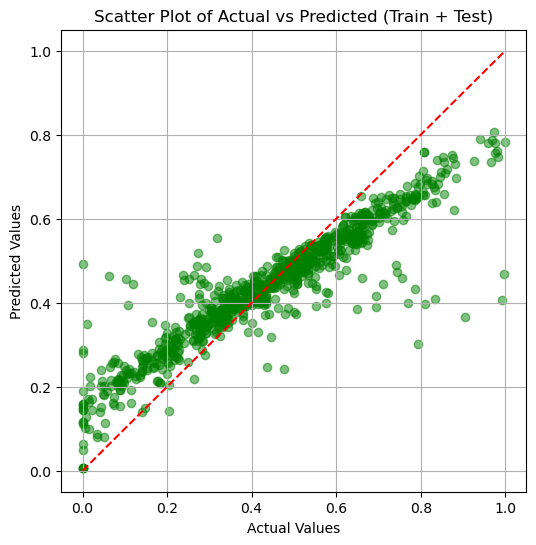

In [38]:

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

plt.figure(figsize=(6,6))

plt.scatter(y_train, y_pred_train, color='green', alpha=0.5, label='Train Data')
plt.scatter(y_test, y_pred_test, color='green', alpha=0.5, label='Test Data')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         color='red', linestyle='--', label='Ideal Line')
plt.title("Scatter Plot of Actual vs Predicted (Train + Test)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)

plt.show()


In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_all = np.concatenate([y_train, y_test])
y_pred_all = np.concatenate([y_pred_train, y_pred_test])

r2 = r2_score(y_all, y_pred_all)


mse = mean_squared_error(y_all, y_pred_all)


rmse = np.sqrt(mse)


mae = mean_absolute_error(y_all, y_pred_all)


print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.7736
MSE: 0.0111
RMSE: 0.1054
MAE: 0.0774
